# 분류(Classification)
> 앙상블 방법(Ensemble Method)
- 정형 데이터의 예측 분석 영역에서 매우 높은 예측 성능으로 인해 애용
- 서로 다른 또는 같은 알고리즘을 단순히 결합한 형태도 있으나,
- 일반적으로 배깅과 부스팅 방식으로 나뉨

> 배깅(Bagging)
- 대표적인 방법 : Random Forest(랜덤 포레스트)

> 부스팅(Boosting)
- 그래디언트 부스팅 (Gradient Boosting) : 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점 -> 최적화 모델 튜닝 어려움
- XgBoost(eXtra Gradient Boost), LightGBM 등 기존 그래디언트 부스팅을 발전시키면서 수행시간을 단축시킨 알고리즘 계속 등장

# 앙상블 방법(Ensemble Method)
- 매우 많은 여러 개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능 향상

## 결정 트리
- 매우 쉽고 유연하게 적용될 수 있는 알고리즘
- 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
- 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(overfitting)이 발생해 예측 성능이 저하될 수도 있다는 단점
- 하지만 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용

- 트리의 깊이(depth)가 깊어질수록 결정트리의 예측 성능이 저하될 가능성 높음(과적합)
- 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야함

- 복잡한 학습 모델은 결국에는 실제 상황에(테스트 데이터 세트) 유연하게 대처할 수 없어 예측 성능이 떨어질 수밖에 없음
- 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움 됌.

### visualization subtree

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, t_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dor 파일을 생성함
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names,
                feature_names = iris_data.feature_names, impurity = True, filled = True)

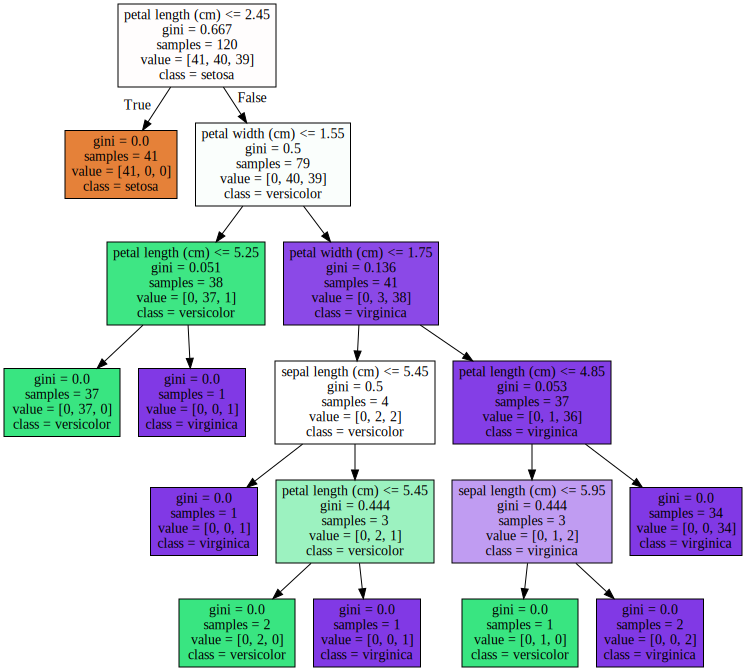

In [3]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 피처 중요도
- feature_importances_

Feature importances : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


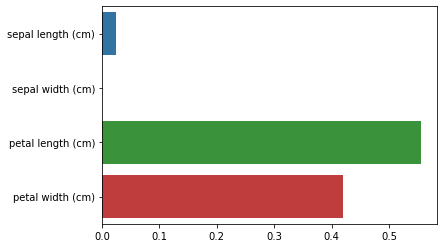

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances : \n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# feature importance를 column 별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

### overfitting(과적합)
- 과적합 되지 않도록 하이퍼 파라미터를 변경해줘야한다
- 노드가 너무 많이 생성(결정 기준이 많음)되면 과적합될 가능성 증가
- 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있음

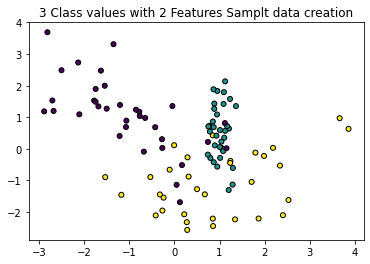

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Samplt data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state = 0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')

### 실습 - 사용자 행동 인식 데이터 세트
- UCI Machine Learning Repository에서 제공하는 사용자 행동 인식 데이터 세트에 대한 예측 분류
- 해당 데이터는 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음
feature_name_df = pd.read_csv('data/human_activity/features.txt', sep = '\s+',
                             header = None, names = ['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출 : ', feature_name[:10])

전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [7]:
# 중복된 피처명 처리
# 총 42개의 피처명 중복
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


column_index
column_name                               
fBodyAcc-bandsEnergy()-1,16              3
fBodyAcc-bandsEnergy()-1,24              3
fBodyAcc-bandsEnergy()-1,8               3
fBodyAcc-bandsEnergy()-17,24             3
fBodyAcc-bandsEnergy()-17,32             3

In [8]:
# 중복된 피처명에 대해서 원본 피처명에 _1 또는 _2를 추가로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

#### load data

In [9]:
# dataset 불러오는 함수
import pandas as pd

def get_human_dataset():
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('data/human_activity/features.txt', sep = '\s+',
                                 header = None, names = ['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 세트와 데스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('data/human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('data/human_activity/test/X_test.txt', sep = '\s+', names = feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFraem으로 로딩하고 칼럼명을 action으로 부여
    y_train = pd.read_csv('data/human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('data/human_activity/test/y_test.txt', sep = '\s+', header = None, names = ['action'])
    
    # 로드 된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test =  get_human_dataset()    

In [11]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [12]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


#### DecisionTreeClassifier

In [13]:
# 우선 DecisionTreeClassifier의 하이퍼 파라미터는 모두 디폴트 값으로 설정
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


##### max_depth

In [14]:
# max_depth
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  4.3min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 16}


In [15]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

param_max_depth  mean_test_score
0               6         0.850791
1               8         0.851069
2              10         0.851209
3              12         0.844135
4              16         0.851344
5              20         0.850800
6              24         0.849440

In [16]:
# 별도의 테스트 데이터 세트에서 확인

max_depths = [6,8,10,12,16,20,24]

# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


In [17]:
# max_depth, min_samples_split
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.8min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [18]:
# GridSearchCV 객체인 grid_cv의 속성인 best_estimator_는 최적 하이퍼 파라미터인 max_depth 8, min_samples_split 16으로 학습이 완료된 Estimator 객체
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


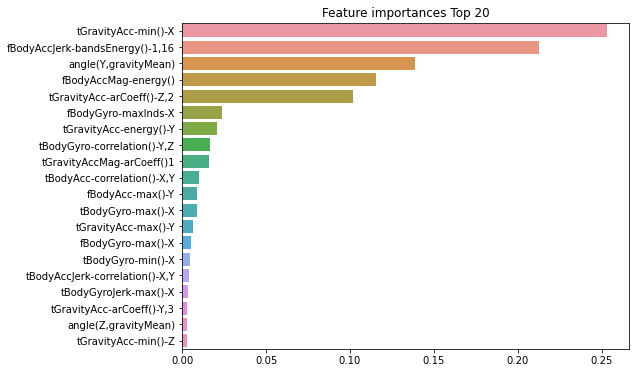

In [19]:
# feature_importances_
# Top 5 피처들이 매우 중요하게 규칙 생성에 영향을 미치고 있음
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

## 앙상블 학습
- 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 이미지, 영상, 음성 등의 비정형 데이터의 분류를 딥러닝이 뛰어난 성능 보임
- 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능
- XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost), Stacking(스태킹)

- 앙상블 학습의 유형은 전통적으로 Voting(보팅), Bagging(배깅), Boosting(부스팅)의 세 가지로 나뉨.

> Voting
- 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합

> Bagging
- 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만,
- 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행
- 교차 검증은 데이터 세트 간의 중첩을 허용하지 않지만, 배깅 방식은 중첩 허용
- Random Forest Algorithm

> Boosting
- 여러 개의 분류기가 순차적으로 학습을 수행하되,
- 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치(weight)를 부여하면서 예측을 진행

> Bootstrapping(부트스트래핑) 분할 방식
- 개별 classifier에게 데이터를 샘플링해서 추출하는 방식

> Stacking
- 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측


### Voting
- 일반적으로 소프트 보팅이 보팅 방법으로 적용

> 하드 보팅(Hard Voting)
- 다수결 원칙과 비슷
- 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정

> 소프트 보팅(Soft Voting)
- 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

### Voting Classifier 
- 보팅 분류기

In [22]:
# 위스콘신 유방암 데이터 세트
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [24]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙삳블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size = 0.2, random_state = 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386
